In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data = pd.read_csv('PHASEdata.csv',header=None, skiprows=1)
z = data[0]
#print(z)
z_approach = z[:500]
z_retract = z[500:]
#print(z_approach)
#print(z_retract)
z_approach_as_numpy = z_approach.as_matrix(columns=None)

#phase shift
pslist = []
for k in range(len(z)):
    phaseshift = data.iloc[k,1:]  #[from zero row to the end row, from second column to the last column]
    #print(phaseshift)
    ps = np.array(phaseshift)
    ps_reshape = np.reshape(ps,(48,48))
    #print(ps)
    pslist.append(ps_reshape)
#print(pslist)

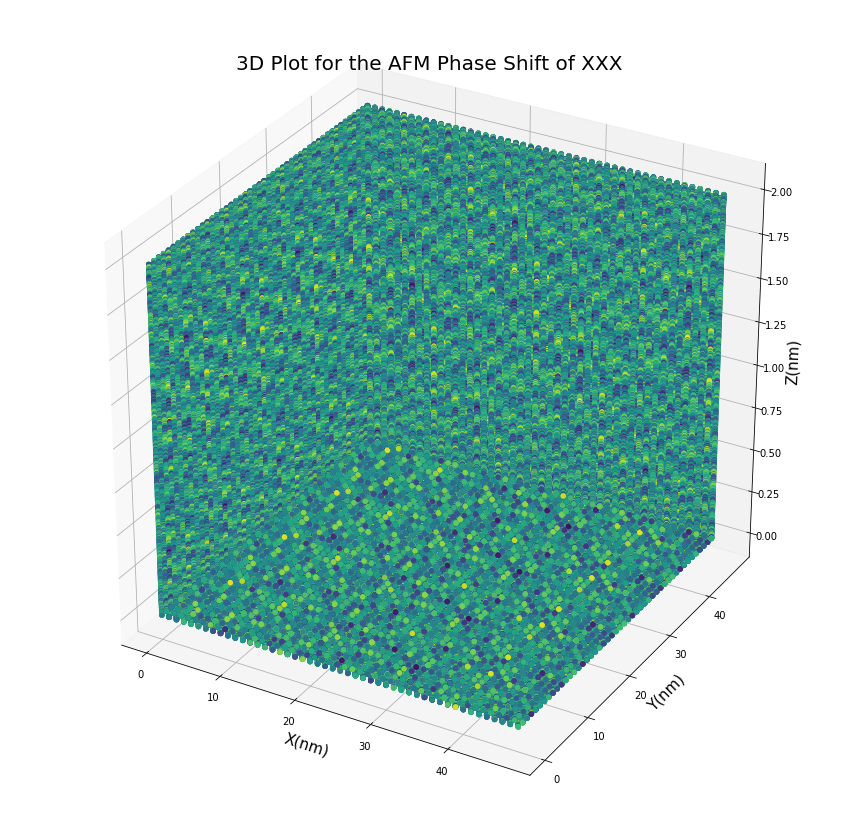

In [3]:
a = np.linspace(0, 47, 48)
b = np.linspace(0, 47, 48)
c = z_approach_as_numpy
x, y, z = np.meshgrid(a, b, c)

#phaseshift information as intensity case
psasas = []
for k in range(len(c)):
    C = pslist[k]
    for i in range(len(a)):
        B = pslist[k][i]
        for j in range(len(b)):
            A = pslist[250][i][j]
            psasas.append(A)
l = psasas

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=.9)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('3D Plot for the AFM Phase Shift of XXX', fontsize=20)
plt.show()

In [ ]:
import numpy as np
a = np.linspace(0, 5, 3)
b = np.linspace(0, 5, 3)
c = np.linspace(0, 5, 3)
np.meshgrid(a, b)

In [ ]:
x.flatten()

In [ ]:
y.flatten()

In [ ]:
A =(x,y)

In [ ]:
print(A)